# MFCC - 간단한 실습

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

### 1. 음성 파일 가져오기 , SR 값 확인


In [2]:
# 1. 음성 파일 가져오기 
file_path = "./blues.00001.wav"
y, sr = librosa.load(file_path)
print("SR rate : ", sr)

SR rate :  22050


### 2. 음성 파일에서 STFT 계산 

In [3]:
hop_length = 512 # 윈도우 이동크기 -> 스펙트로 그램을 생성할때 얼마만큼 쪼개서 생성할거냐 !
n_fft = 2048 # FFT : 주어진 시간 대역에서 주파수 정보를 추출 하는데 사용 ! 
stft = librosa.stft(y, n_fft=n_fft, hop_length=hop_length) # 시간-주파수 영역의 표현인 스펙트로그램 값

print(stft)

[[ 5.3796820e-02+0.0000000e+00j  2.8211858e+00+0.0000000e+00j
   7.7053776e+00+0.0000000e+00j ... -1.4414183e+00+0.0000000e+00j
  -1.3481982e+00+0.0000000e+00j -4.1797791e+00+0.0000000e+00j]
 [ 5.0167871e-01+8.3506501e-01j -4.0155300e-01+1.2011561e+00j
  -3.8527081e+00+3.6937428e+00j ... -3.1102002e-01+1.2594367e+00j
   1.1273700e+00-1.0498327e+00j  2.2146888e+00-2.0105529e+00j]
 [-1.9553659e+00-6.6863143e-01j  1.9860005e+00+1.8980149e+00j
   1.9972939e+00-3.7817092e+00j ...  1.7908789e+00-1.4895716e+00j
  -1.7049931e+00+1.4737532e+00j  4.2140970e+00+2.6621089e+00j]
 ...
 [ 5.3247431e-04+2.3299521e-05j -3.7518758e-04-1.0608655e-04j
  -4.7851045e-05+1.9487874e-04j ...  7.8283356e-06+5.9137466e-05j
   1.2221524e-03-5.0121918e-03j -7.8109335e-03+3.6176901e-02j]
 [-4.1708208e-04+1.3295542e-04j  3.2084421e-04+3.4094224e-04j
   1.5252092e-04-2.3216791e-04j ... -7.8446043e-05-1.1500816e-04j
   3.7801645e-03-3.0535129e-03j -2.3120986e-02-2.8629614e-02j]
 [ 2.6630767e-04+0.0000000e+00j -2.04545

### 3. 멜 스케일 필터 방정식을 이용해서 Mel Spectrogram 계산 


In [4]:
n_mels = 40 # 20 ~ 40 사이 값으로 설정하시면됩니다. 대부분 음악분석 20 ~ 40 

# librosa.power_to_db() => 진폭을 데시벨 형태 변환 
# np.abs(stft)**2 => STFT 절대값 제곱한 값 
# STFT -> 진폭을 나타내는 파워 스팩트로그램 계산 -> mel_spec
mel_spec = librosa.feature.melspectrogram(S=librosa.power_to_db(np.abs(stft)**2), sr=sr, n_mels=n_mels)
print(mel_spec)

[[ 0.04016396  1.8871574   2.7044704  ...  1.5847964   1.5435765
   1.8997383 ]
 [ 0.3447038   1.8233913   2.2484555  ...  1.8193796   1.4597857
   1.5174086 ]
 [ 0.6592664   1.5573025   1.7091428  ...  1.7699649   1.6102383
   1.7226015 ]
 ...
 [-3.32745    -2.7481506  -2.0501025  ... -1.5864514  -1.6176102
  -1.5179352 ]
 [-3.3275242  -3.2640657  -2.955185   ... -2.3985326  -2.326535
  -2.0758765 ]
 [-3.327437   -3.327437   -3.3154142  ... -3.3145826  -3.3130703
  -2.6448479 ]]


### 4.  mel_spec ===> MFCC 계산 하기 

In [5]:
n_mfcc = 13 # 음성 분야에서는 12 ~ 13 특정 백터 추출 하는 것이 일반적 ==> MFCC 원하는 개수의 특징 백터를 추출하는 파라미터 값 
# mel_spec ===> 파워 스펙토그램에서 데시벨 변환 
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(mel_spec), n_mfcc=n_mfcc)
print(mfccs)

[[-423.04688   -405.76004   -319.62463   ... -314.74927   -339.26782
  -325.84183  ]
 [  74.737076    97.57477    183.01984   ...  171.12823    159.65662
   177.53833  ]
 [  69.05983     87.35002     89.49732   ...   67.10045     78.234024
    91.55201  ]
 ...
 [ -15.8296585  -20.409237   -17.092026  ...  -31.796183   -46.68096
    -7.1080694]
 [ -18.901978   -16.981878    -6.070834  ...  -11.331359   -28.349771
     6.483469 ]
 [ -19.175297   -10.651993     9.756364  ...   -9.648254     3.243166
    15.470432 ]]


### 5. 시각화 및 저장 


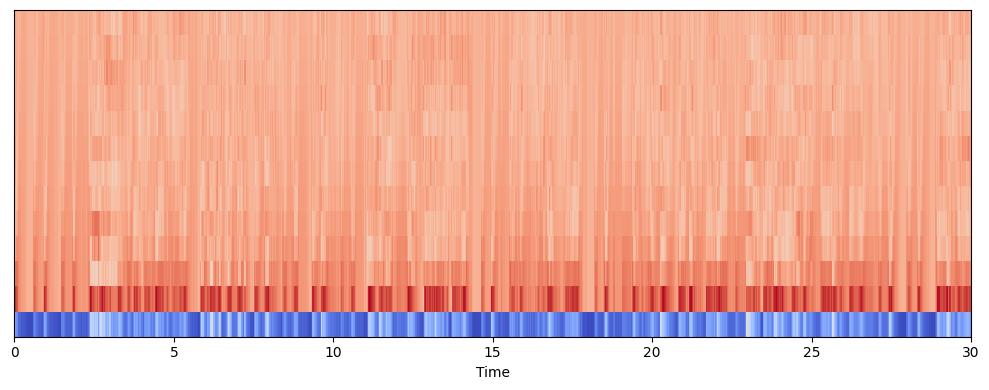

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [8]:
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.tight_layout()


plt.savefig("MFCC.png", dpi=300, bbox_inches='tight')
plt.close()